In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("E:\\Notes\\Statistics\\Feature Engineering\\Datasets\\data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


#### **Method 1- Complete Case Analysis (Removing Missing Values)**

In [5]:
# Percentage of missing data in each column -
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

##### **Observation -**
- We cannot apply CCA on columns having Missing percentage > 5%

In [8]:
# Extracting columns having missing values < 5%
col = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[col].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [11]:
# Calculating %age of data left after removing na rows
len(df[col].dropna()) / len(df)

0.8968577095730244

We still have almost 90% of data available

In [12]:
new_df  = df[col].dropna()
df.shape , new_df.shape

((19158, 13), (17182, 5))

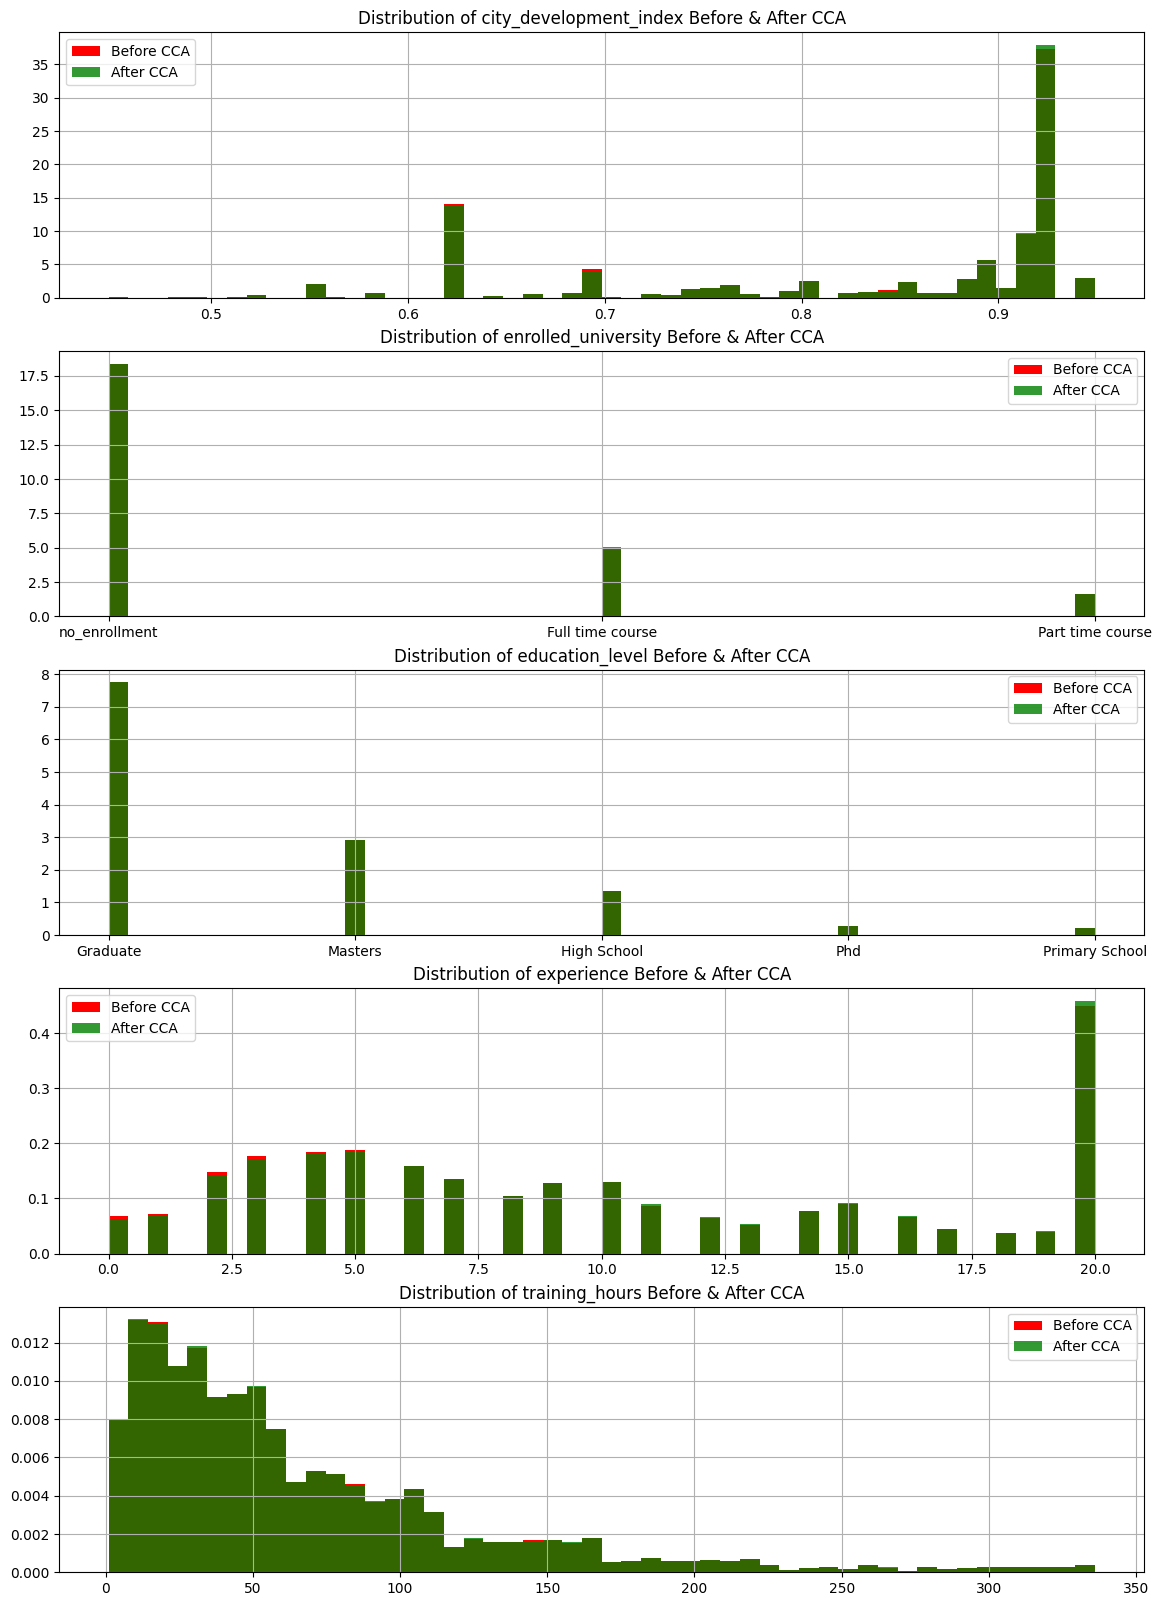

In [25]:
# Checking Data Distribution of Missing Columns before & after CCA
plt.figure(figsize=(14, 4 * len(df[col].columns)))  # Dynamically adjust figure size

for i, var in enumerate(df[col].columns, 1):  
    ax = plt.subplot(len(df[col].columns), 1, i)  # Create subplots
    
    # Original Data
    df[var].hist(bins=50, ax=ax, density=True, color='red', label="Before CCA")
    
    # Data after CCA
    new_df[var].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8, label="After CCA")
    
    plt.title(f"Distribution of {var} Before & After CCA")  
    plt.legend()  

plt.show()


Observation - As you can see majority of the data after removing overlaps with before data so we can say the data is MCAR.